<a href="https://colab.research.google.com/github/RomersonMonteiro/Arquivos-DNC/blob/master/Mini_Projeto_Roof_Im%C3%B3veis_Romerson_Monteiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mini Projeto - Roof Imóveis**

##Bibliotecas


In [ ]:

!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns

import zipfile as zip
import requests
import io

import scipy.stats as stats
import geopandas as gpd
from shapely.geometry import Point, Polygon


##Importando dados do Kagle

> Bloco com recuo



In [ ]:
#FONTE: 'https://www.kaggle.com/datasets/harlfoxem/housesalesprediction'
kc = pd.read_csv('/content/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##Importando dados Capitol Impact

In [ ]:
#Zip Code List County - King County, Washington
#FONTE: 'https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033'
zp = pd.read_csv('/content/ZIP CODE.csv',sep=';')
zp = zp[~zp['Zip Code'].duplicated()] #Pegando o primeiro ZIP CODE dos casos Duplicados
zp.head()

,Zip Code,City,Country
0,98001,Algona,King County
3,98002,Auburn,King County
4,98003,Auburn,King County
6,98004,Beaux Arts Village,King County
11,98005,Bellevue,King County


## Unindo Tabelas

In [ ]:
df = kc.join(zp.set_index('Zip Code'),on='zipcode',how='left')

##Tamanho e Dtypes

In [ ]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Country
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,King County
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,King County
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore,King County
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,King County
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish,King County


In [ ]:
df.shape, kc.shape, zp.shape

((21613, 23), (21613, 21), (108, 3))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Coleta de Dados

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


**Atributos gerais** <br>
```id``` -> Identificador único do imóvel <br>
```date``` -> data da venda <br>
```price``` -> preço de venda <br>
<br>
**Atributos relativos ao imóvel:** <br>
```bedrooms``` -> quantidade de quartos <br>
```bathrooms``` -> Quantidade de banheiros. *Os números possuem decimais pois a contagem americana leva em consideração os elementos do banheiro. Um banheiro completo possui uma pia, um vaso, um chuveiro e uma banheiro. As frações de um banheiro são a falta de um desses elementos.* <br>
```sqft_liv``` -> área construída em ft<sup>2</sup> <br>
```sqft_lot``` -> área do terreno em ft<sup>2</sup> <br>
```floors``` -> Quantidade de andares <br>
```waterfront``` -> Se o imóvel é beira-mar. 0 se falso. <br>
```view``` -> Grau de beleza da vista do imóvel. Escala de 0 a 4 <br>
```condition``` -> Condição da casa. Escala de 1 a 5, onde:<br>
1. Deteriorada. Muitos reparos necessários, próxima de uma total reconstrução;
2. Ruim. Muitos reparos necessários e/ou sistemas inadequados que prejudicam a vida útil do imóvel;
3. Mediana. Alguns sinais de usado, mas com toda a estrutura funcional;
4. Boa. Nenhuma manutenção aparente, com a aparência e a estrutura acima do padrão
5. Excelente. Nenhum sinal de deterioração e obsolência, com a estrutura geral mostrando um alto grau de utilidade
<br>

```grade``` -> Classificação da qualiade dos materiais de construção do imóvel. A escala vai de 1 a 13
1. Estrutura muito abaixo dos padrões. Normalmente se trata de uma cabana;
2. Estrutura muito abaixo dos padrões. Normalmente se trata de uma cabana;
3. Estrutura muito abaixo dos padrões. Normalmente se trata de uma cabana;
4. Construção muito antiga;
5. Construção de baixo custo, pequeno e estética simples;
6. Nível mais baixo dos padrões oficiais. Materiais de baixa qualidade e estética simples;
7. Nivel mediano de construção. 
8. Nível médio-alto. Possui materiais melhores no exterior e no interior.
9. Nível alto de materiais e design.
10. Refinado. Materiais de excelente qualidade, com um acabamento cuidadoso e um design mais trabalhado. Normalmente possui uma área grande.
11. Design personalizado, com elementos de luxo no acabamento dos comodos.
12. Design personalizado, materiais do mais alto grau e obra realizado por uma construtura reconhecida.
13. Mansões luxuosas.
<br>

```sqft_above``` -> área acima do solo em ft<sup>2</sup> <br>
```sqft_basmt``` -> área abaixo do solo em ft<sup>2</sup> <br>
```yr_built``` -> ano de construção <br>
```yr_renov``` -> ano de reconstrução. Se nunca feita, o valor é 0 <br>
<br>
**Atributos relativos à localização:** <br>
```zipcode``` -> Código postal <br>
```lat``` -> Latitude <br>
```long``` -> Longitude <br>
```squft_liv15``` -> Média da área habitável dos 15 imóveis mais próximos, em ft<sup>2</sup> <br>
```squft_lot15``` -> Média da área do terreno dos 15 imóveis mais próximos, em ft<sup>2</sup> <br>

##Analisando avaliações

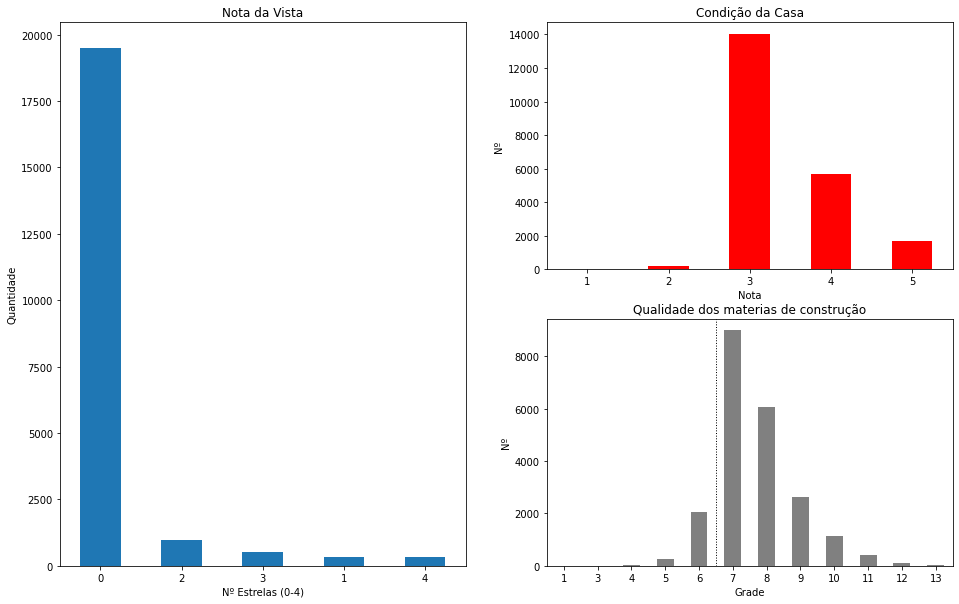

In [ ]:
from pandas._libs.algos import pad
plt.figure(figsize=(16, 10))

################ Nota da Vista ########################
plt.subplot(121)
df['view'].value_counts().plot(kind="bar",subplots=True)
plt.title('Nota da Vista'),plt.ylabel('Quantidade')
plt.xlabel('Nº Estrelas (0-4)')
plt.xticks(rotation=0)

################ Nota Condição da Casa ################
plt.subplot(222)
df['condition'].value_counts().sort_index().plot(kind="bar",subplots=True,color='red')
plt.title('Condição da Casa')
plt.ylabel('Nº'),plt.xlabel('Nota')
plt.xticks(rotation=0)

######### Nota Qualidade de construção da Casa #########
plt.subplot(224)
df['grade'].value_counts().sort_index().plot(kind="bar",subplots=True,color='gray')
plt.title('Qualidade dos materias de construção')
plt.ylabel('Nº'),plt.xlabel('Grade')
plt.xticks(rotation=0)
plt.axvline(4.5, label='Casas com notas menores que 6 são de qualidade baixa',linestyle=':', linewidth=1, color='black')

plt.show()

In [ ]:
df['Estrela Vazio'] = df['view'].isnull()
df[df['Estrela Vazio']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Country,Estrela Vazio


## Limpeza dos Dados

In [ ]:
df.sort_values(by="date",inplace=True)
df_final = df.drop_duplicates(subset=['id'])

## Tratamento dos Dados

In [ ]:
df.date = pd.to_datetime(df.date.str[:8])

## Explorando os dados

###Cidade de cada imóvel

In [ ]:
df_final.City.value_counts()

Seattle               7186
Auburn                1316
Bellevue              1080
Kirkland               974
Redmond                973
Newcastle              869
Burien                 851
Sammamish              793
Issaquah               731
Renton                 711
Kent                   648
Maple Valley           587
Covington              547
Lk Forest Park         442
Algona                 359
Beaux Arts Village     315
Snoqualmie             307
Kenmore                282
Mercer Island          282
Des Moines             275
Woodinville            272
Enumclaw               234
North Bend             219
Bothell                194
Duvall                 190
Seatac                 135
Carnation              123
Vashon                 117
Black Diamond           99
Fall City               80
Medina                  49
Name: City, dtype: int64

###Visualização em Mapa

In [ ]:
######################## Mapa #########################
# Processo para importar o dataset diretamente do site
url = "https://geodacenter.github.io/data-and-lab/data/kingcounty.zip"

# Faz a requisição do arquivo .zip
contents = requests.get(url)
buf1 = io.BytesIO(contents.content)

In [ ]:
# Descompacta o buffer em modo de leitura
with zip.ZipFile(buf1, "r") as zp:
  
# Procura o arquivo .geojson com as coordenados dos polígonos
# que define os limites do mapa

  for name in zp.namelist():          
    if name.endswith('King_county_zip.geojson'):

      # abre o arquivo e salva em um dataframe geoPandas
      with zp.open(name) as zd:
        dfMap = gpd.read_file(zd)
      break

Text(0.5, 1.05, 'Localização dos imóveis')

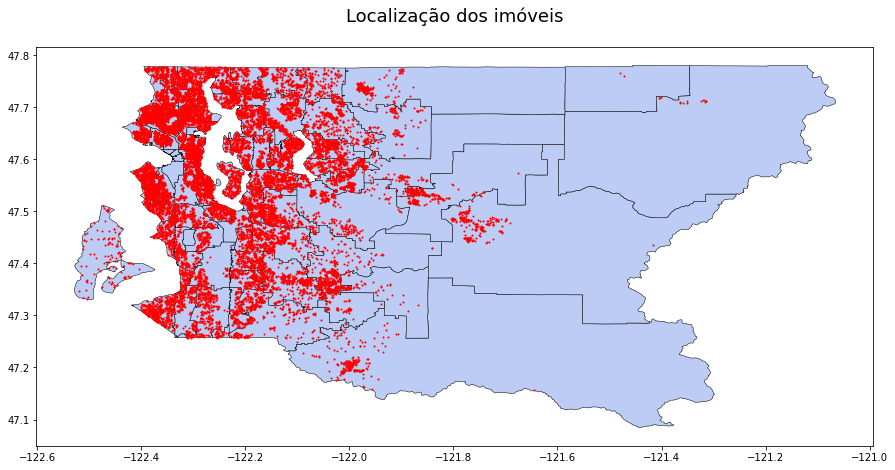

In [ ]:
# Define o mapa onde os pontos devem ser plotados
kcMapa = dfMap.plot(figsize=(15,15),color='#bcccf5', edgecolor='black', linewidth=0.5)

# Gera as coordenadas em tipo Shapely.Point com base na latitude e longitude
coordenadas = gpd.GeoDataFrame(df_final[['zipcode','long', 'lat']], geometry=gpd.points_from_xy(df_final.long, df_final.lat))

# filtro do que será plotado no mapa
# Definir uma forma de filtra as coordenadas
# para mostrar apenas os imóveis relevantes

# Plota os as cidades no mapa
coordenadas.plot(ax=kcMapa, color='red', markersize=1)
plt.title('Localização dos imóveis',y=1.05,fontsize=18)

### Preço por àrea do imóvel

In [ ]:
df_final['preco_m2'] = (df.price/df.sqft_lot)*0.3048
df_final['preco_m2'].head()

<ipython-input-23-0424ed61bb00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['preco_m2'] = (df.price/df.sqft_lot)*0.3048


16768    3.80
9596    50.69
9587     3.05
20602   26.03
11577   16.52
Name: preco_m2, dtype: float64

###O lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período

In [ ]:
# Agrupando por id onde só tem ocorrencia de 2 ou mais vezes
df1 = df.groupby("id").filter(lambda x: len(x) > 1)

# Pegando a Data Máx e Min dado que a maioria tem em torno de 2 repetições
df_max = df1[df1.groupby('id').date.transform('max') == df1['date']]
df_min = df1[df1.groupby('id').date.transform('min') == df1['date']]

#Criando um data set de valor rec (preço mais recente) e ant (preço mais antigo)
total = pd.DataFrame( df_max[['id','date','price']],columns=['id','date','price'])
total.rename(columns = {'date':'date_rec', 'price':'price_rec'}, inplace = True)

total = total.join(df_min[['id','date','price']].set_index('id'),on='id',how = 'left')
total.rename(columns = {'date':'date_ant', 'price':'price_ant'}, inplace = True)

total.head()

,id,date_rec,price_rec,date_ant,price_ant
11363,7701960990,2014-08-19,870000.00,2014-06-16,862000.00
20054,8648900110,2014-08-26,555000.00,2014-05-05,555000.00
7846,4139420590,2014-08-27,1200000.00,2014-05-20,1212500.00
11459,4305200070,2014-09-22,561000.00,2014-05-19,350000.00
10258,1995200200,2014-10-08,415000.00,2014-05-06,313950.00


In [ ]:
#Calculo dos casos que tiveram lucro ou perda
total['Lucro'] = total.price_rec - total.price_ant
total['Lucro_Ind'] = [1 if lucro>0 else 0 for lucro in total['Lucro']]
total.head()

,id,date_rec,price_rec,date_ant,price_ant,Lucro,Lucro_Ind
11363,7701960990,2014-08-19,870000.00,2014-06-16,862000.00,8000.00,1
20054,8648900110,2014-08-26,555000.00,2014-05-05,555000.00,0.00,0
7846,4139420590,2014-08-27,1200000.00,2014-05-20,1212500.00,-12500.00,0
11459,4305200070,2014-09-22,561000.00,2014-05-19,350000.00,211000.00,1
10258,1995200200,2014-10-08,415000.00,2014-05-06,313950.00,101050.00,1


In [ ]:
df_final = df_final.join(total.set_index('id'),on='id',how='left')
df_final.query('Lucro_Ind==1 | Lucro_Ind==0 ').sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,City,Country,Estrela Vazio,preco_m2,date_rec,price_rec,date_ant,price_ant,Lucro,Lucro_Ind
14855,324000530,20140708T000000,201500.00,3,1.00,1320,5000,1.50,0,0,...,Seattle,King County,False,12.28,2015-03-23,459000.00,2014-07-08,201500.00,257500.00,1.00
17204,4139440480,20140626T000000,695000.00,3,2.75,2590,12063,2.00,0,0,...,Bellevue,King County,False,17.56,2014-12-01,796500.00,2014-06-26,695000.00,101500.00,1.00
13023,9211500620,20141008T000000,182700.00,3,2.25,1740,6650,1.00,0,0,...,Auburn,King County,False,8.37,2015-04-28,305000.00,2014-10-08,182700.00,122300.00,1.00
15199,9834200305,20140716T000000,350000.00,3,1.00,1790,3876,1.50,0,0,...,Seattle,King County,False,27.52,2015-02-10,615000.00,2014-07-16,350000.00,265000.00,1.00
3950,1825069031,20140814T000000,550000.00,4,1.75,2410,8447,2.00,0,3,...,Sammamish,King County,False,19.85,2014-10-16,550000.00,2014-08-14,550000.00,0.00,0.00


###Ajustando os dados

In [ ]:
df_final.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,City,Country,Estrela Vazio,preco_m2,date_rec,price_rec,date_ant,price_ant,Lucro,Lucro_Ind
16768,5561000190,20140502T000000,437500.00,3,2.25,1970,35100,2.00,0,0,...,Issaquah,King County,False,3.80,NaT,NaN,NaT,NaN,NaN,NaN
9596,472000620,20140502T000000,790000.00,3,2.50,2600,4750,1.00,0,0,...,Seattle,King County,False,50.69,NaT,NaN,NaT,NaN,NaN,NaN
9587,1024069009,20140502T000000,675000.00,5,2.50,2820,67518,2.00,0,0,...,Issaquah,King County,False,3.05,NaT,NaN,NaT,NaN,NaN,NaN
20602,7853361370,20140502T000000,555000.00,4,2.50,3310,6500,2.00,0,0,...,Snoqualmie,King County,False,26.03,NaT,NaN,NaT,NaN,NaN,NaN
11577,5056500260,20140502T000000,440000.00,4,2.25,2160,8119,1.00,0,0,...,Bellevue,King County,False,16.52,NaT,NaN,NaT,NaN,NaN,NaN


###Atribuindo Quantidades de moradias a venda por cidade como peso de ser Bom ou Ruim

In [ ]:
city_qtd = dict(df_final.City.value_counts())
df_final['City_Qtd'] = df_final['City'].map(city_qtd)

###Excluindo colunas desnecessárias

In [ ]:
print("Colunas do DataFrame: ", df_final.columns.tolist())

Colunas do DataFrame:  ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'City', 'Country', 'Estrela Vazio', 'preco_m2', 'date_rec', 'price_rec', 'date_ant', 'price_ant', 'Lucro', 'Lucro_Ind', 'City_Qtd']


In [ ]:
df_score = df_final.drop(['date','sqft_living','sqft_lot','floors',
                          'waterfront','sqft_above','sqft_basement',
                          'Country','Estrela Vazio','date_rec',
                          'price_rec','date_ant','Lucro_Ind','price_ant',
                          'yr_built','yr_renovated','zipcode','lat','long',
                          'sqft_living15','sqft_lot15','sqft_living','price','City'                         
                          ], axis=1)

In [ ]:
print("Colunas do DataFrame: ", df_score.columns.tolist())

Colunas do DataFrame:  ['id', 'bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'preco_m2', 'Lucro', 'City_Qtd']


###Normalizando os dados

In [ ]:
df_score.loc[:,'bedrooms':'City_Qtd'] = (df_score.loc[:,'bedrooms':'City_Qtd']-df_score.loc[:,'bedrooms':'City_Qtd'].min())/(df_score.loc[:,'bedrooms':'City_Qtd'].max()-df_score.loc[:,'bedrooms':'City_Qtd'].min())*100

In [ ]:
df_score=df_score.replace(np.nan,0)
df_score.sample(10)

,id,bedrooms,bathrooms,view,condition,grade,preco_m2,Lucro,City_Qtd
14041,2050100210,9.09,31.25,75.00,50.00,75.00,2.27,0.00,10.42
10001,2126059139,15.15,40.62,0.00,100.00,50.00,2.88,0.00,12.96
5019,5151600170,9.09,18.75,0.00,75.00,58.33,1.14,0.00,17.75
14851,2301400276,12.12,31.25,0.00,50.00,58.33,8.61,0.00,100.00
2936,203600600,12.12,31.25,0.00,50.00,66.67,0.55,0.00,1.04
8257,579002600,9.09,21.88,25.00,75.00,58.33,6.25,0.00,100.00
15705,1545801410,9.09,31.25,0.00,50.00,50.00,1.86,0.00,7.54
8875,522039103,6.06,18.75,0.00,75.00,50.00,0.18,0.00,0.95
17972,1310440590,9.09,31.25,0.00,50.00,66.67,3.44,0.00,9.28
1855,6699000810,15.15,31.25,0.00,50.00,58.33,2.69,0.00,6.98


###Gerando o Score

In [ ]:
classe = list(df_score.loc[:,'bedrooms':'City_Qtd'])
notas  = [11,9,4,8,8,20,5,35]
d = {'Classe':classe,'Pesos':notas}
peso = pd.DataFrame(d)
print(f'Tem:   {peso.Pesos.sum()}\nFalta: {100-peso.Pesos.sum()}')
peso.head(8)

Tem:   100
Falta: 0


,Classe,Pesos
0,bedrooms,11
1,bathrooms,9
2,view,4
3,condition,8
4,grade,8
5,preco_m2,20
6,Lucro,5
7,City_Qtd,35


In [ ]:
peso.sort_values('Pesos',ascending=False,inplace=True)
peso.head(8)

,Classe,Pesos
7,City_Qtd,35
5,preco_m2,20
0,bedrooms,11
1,bathrooms,9
3,condition,8
4,grade,8
6,Lucro,5
2,view,4


In [ ]:
peso = dict(np.array(peso))

###Calculo do Score

In [ ]:
df_score['score'] = (
                     df_score.City_Qtd * peso['City_Qtd'] + 
                     df_score.preco_m2 * peso['preco_m2'] + 
                     df_score.bedrooms * peso['bedrooms'] + 
                     df_score.bathrooms * peso['bathrooms'] + 
                     df_score.condition * peso['condition'] + 
                     df_score.grade * peso['grade'] + 
                     df_score.Lucro * peso['Lucro'] + 
                     df_score.view * peso['view']                      
                    )/100
df_score.head()

,id,bedrooms,bathrooms,view,condition,grade,preco_m2,Lucro,City_Qtd,score
16768,5561000190,9.09,28.12,0.00,75.00,66.67,0.61,0.00,9.56,18.33
9596,472000620,9.09,31.25,0.00,75.00,66.67,8.20,0.00,100.00,51.79
9587,1024069009,15.15,31.25,0.00,50.00,58.33,0.49,0.00,9.56,16.59
20602,7853361370,12.12,31.25,0.00,50.00,58.33,4.20,0.00,3.61,14.92
11577,5056500260,12.12,28.12,0.00,50.00,58.33,2.67,0.00,14.45,18.12


In [ ]:
df_final = df_final.join(df_score.loc[:,['id','score']].set_index('id'),on='id',how='left')

In [ ]:
df_final.sort_values('score',ascending=False,inplace=True)

###Resultados

##TOP 5 imóveis

In [ ]:
# Padronização de display do dataframe
pd.options.display.float_format = '{:.2f}'.format

df_final[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'preco_m2', 'score']].head()

,id,date,price,bedrooms,bathrooms,view,condition,grade,preco_m2,score
3452,2559950110,20150422T000000,1234570.00,2,2.50,0,3,11,617.89,69.15
15679,5026900235,20140911T000000,1850000.00,4,3.25,3,5,9,299.94,66.03
7252,6762700020,20141013T000000,7700000.00,6,8.00,3,4,13,85.03,65.75
6508,4217402115,20150421T000000,3650000.00,6,4.75,4,5,11,57.34,62.87
15258,1732800780,20150212T000000,3065000.00,5,3.00,4,5,11,124.56,62.74


##LAST 5 imóveis

In [ ]:
df_final[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'preco_m2', 'score']].tail()

,id,date,price,bedrooms,bathrooms,view,condition,grade,preco_m2,score
15337,7849200635,20140630T000000,235000.00,2,1.00,0,1,6,2.49,6.47
380,1726059053,20140916T000000,270000.00,2,1.50,0,1,6,0.39,6.41
465,8658300340,20140523T000000,80000.00,1,0.75,0,2,4,4.83,5.69
5832,5702500050,20141104T000000,280000.00,1,0.00,0,2,3,3.48,4.61
19452,3980300371,20140926T000000,142000.00,0,0.00,0,1,1,2.07,0.22


###Gráfico

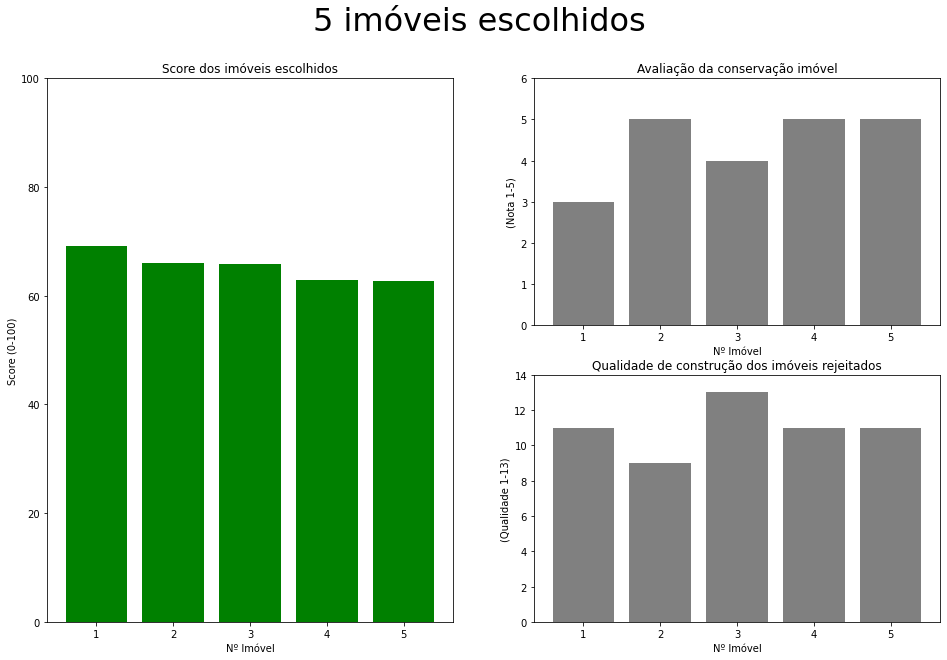

In [ ]:
plt.figure(figsize=(16, 10))
plt.suptitle('5 imóveis escolhidos', fontsize=32)

# Cria um DF com as últimas 5 casas do ranking
top5 = df_final.head(5).set_index(pd.Index([1,2,3,4,5]))

################ Score das top 5 ################
plt.subplot(121)
plt.bar(top5.index, top5.score, width=0.8, align='center', color='green')
plt.title('Score dos imóveis escolhidos'),plt.ylabel('Score (0-100)')
plt.xlabel('Nº Imóvel')
plt.xticks(rotation=0)
plt.ylim([0,100])

################ Nota das top 5 ################
plt.subplot(222)
plt.bar(top5.index, top5.condition, width=0.8, align='center', color='grey')
plt.title('Avaliação da conservação imóvel'),plt.ylabel('(Nota 1-5)')
plt.xlabel('Nº Imóvel')
plt.xticks(rotation=0)
plt.ylim([0,6])

################ Condição das top 5 ################
plt.subplot(224)
plt.bar(top5.index, top5.grade, width=0.8, align='center', color='grey')
plt.title('Qualidade de construção dos imóveis rejeitados'),plt.ylabel('(Qualidade 1-13)')
plt.xlabel('Nº Imóvel')
plt.xticks(rotation=0)
plt.ylim([0,14])

plt.show()

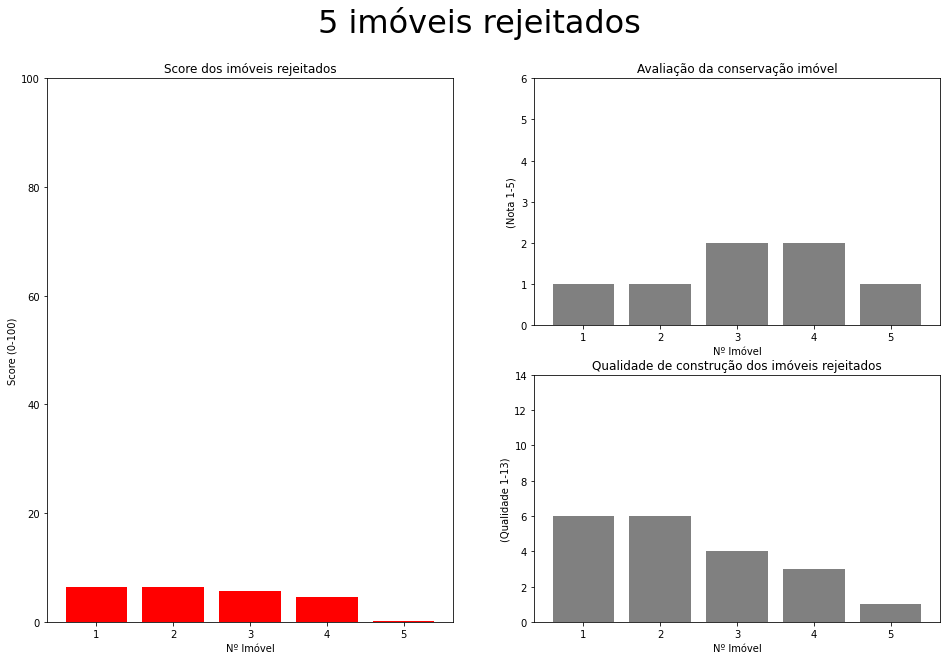

In [ ]:
plt.figure(figsize=(16, 10))
plt.suptitle('5 imóveis rejeitados', fontsize=32)

# Cria um DF com as últimas 5 casas do ranking
last5 = df_final.tail(5).set_index(pd.Index([1,2,3,4,5]))

################ Score das last 5 ################
plt.subplot(121)
plt.bar(last5.index, last5.score, width=0.8, align='center', color='red')
plt.title('Score dos imóveis rejeitados'),plt.ylabel('Score (0-100)')
plt.xlabel('Nº Imóvel')
plt.xticks(rotation=0)
plt.ylim([0,100])

################ Nota das last 5 ################
plt.subplot(222)
plt.bar(last5.index, last5.condition, width=0.8, align='center', color='grey')
plt.title('Avaliação da conservação imóvel'),plt.ylabel('(Nota 1-5)')
plt.xlabel('Nº Imóvel')
plt.xticks(rotation=0)
plt.ylim([0,6])

################ Condição das last 5 ################
plt.subplot(224)
plt.bar(last5.index, last5.grade, width=0.8, align='center', color='grey')
plt.title('Qualidade de construção dos imóveis rejeitados'),plt.ylabel('(Qualidade 1-13)')
plt.xlabel('Nº Imóvel')
plt.xticks(rotation=0)
plt.ylim([0,14])

plt.show()

(47.5, 47.77)

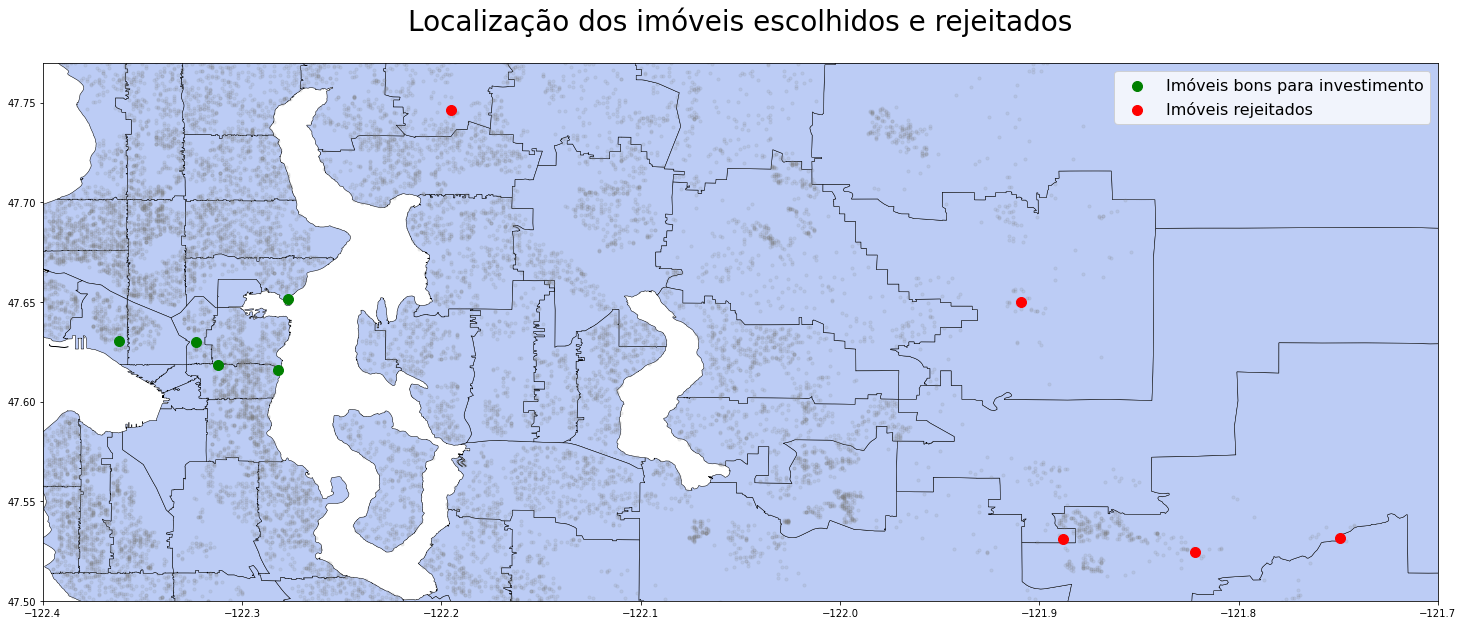

In [ ]:
# Define o mapa onde os pontos devem ser plotados
kcMapa = dfMap.plot(figsize=(25,25),color='#bcccf5', edgecolor='black', linewidth=0.5)

df_top5 = df_final.head(5).copy()
df_bottom5 = df_final.tail(5).copy()
# Gera as coordenadas em tipo Shapely.Point com base na latitude e longitude
coord_all = gpd.GeoDataFrame(df_final[['zipcode','long', 'lat']], geometry=gpd.points_from_xy(df_final.long, df_final.lat))
coord_top = gpd.GeoDataFrame(df_top5[['zipcode','long', 'lat']], geometry=gpd.points_from_xy(df_top5.long, df_top5.lat))
coord_bottom = gpd.GeoDataFrame(df_bottom5[['zipcode','long', 'lat']], geometry=gpd.points_from_xy(df_bottom5.long, df_bottom5.lat))

# Plota os as cidades no mapa
coord_all.plot(ax=kcMapa, color='grey', alpha = 0.13, markersize=10)
coord_top.plot(ax=kcMapa, color='green', markersize=100, label='Imóveis bons para investimento')
coord_bottom.plot(ax=kcMapa, color='red', markersize=100, label='Imóveis rejeitados')
plt.title('Localização dos imóveis escolhidos e rejeitados',y=1.05,fontsize=28)
plt.legend(prop={'size': 16})

# Zooming the area
minx, miny, maxx, maxy = (-122.4,47.5,-121.7,47.77)
kcMapa.set_xlim(minx, maxx)
kcMapa.set_ylim(miny, maxy)

#JUSTIFICATIVAS
````TOP 5````





````LAST 5````





Text(0.5, 1.05, 'Localização geral dos imóveis')

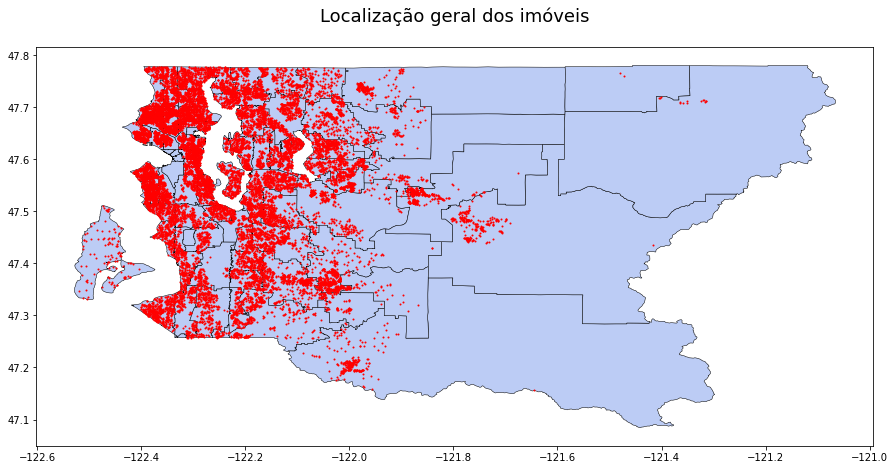

In [ ]:
# Define o mapa onde os pontos devem ser plotados
kcMapa = dfMap.plot(figsize=(15,15),color='#bcccf5', edgecolor='black', linewidth=0.5)

# Gera as coordenadas em tipo Shapely.Point com base na latitude e longitude
coordenadas = gpd.GeoDataFrame(df_final[['zipcode','long', 'lat']], geometry=gpd.points_from_xy(df_final.long, df_final.lat))

# filtro do que será plotado no mapa
# Definir uma forma de filtra as coordenadas
# para mostrar apenas os imóveis relevantes

# Plota os as cidades no mapa
coordenadas.plot(ax=kcMapa, color='red', markersize=1)
plt.title('Localização geral dos imóveis',y=1.05,fontsize=18)